데이터분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r'C:\Users\kolan\github\DataScience\soccer\player_data\train.csv')
test = pd.read_csv(r'C:\Users\kolan\github\DataScience\soccer\player_data\test.csv')

print(f"Train 데이터 크기:", (train.shape))
print(f"Test 데이터 크기:", (test.shape))

Train 데이터 크기: (3019, 66)
Test 데이터 크기: (1626, 65)


In [7]:
import pandas as pd

# 1. 데이터 불러오기
# 파일이 코드와 같은 폴더에 있다면 바로 파일명만 쓰셔도 됩니다.
df = pd.read_csv(r'C:\Users\kolan\github\DataScience\soccer\player_data\train.csv')

# 2. 미드필더 포지션 리스트 정의
# 축구 데이터에서 미드필더로 분류되는 주요 포지션들입니다.
mid_positions = ['RM', 'CAM', 'LM', 'CM', 'CDM']

# 3. 데이터 필터링
# .copy()를 붙여주는 이유는 원본 데이터와 별개의 독립된 데이터프레임을 만들기 위해서입니다. (추천 방식)
mid_df = df[df['Position'].isin(mid_positions)].copy()

# 4. 인덱스 초기화
# 중간중간 빠진 행 번호를 0, 1, 2... 순서대로 다시 매깁니다.
mid_df = mid_df.reset_index(drop=True)

# 5. 결과 확인
print(f"전체 선수 중 미드필더는 총 {len(mid_df)}명입니다.")
print("-" * 30)
print(mid_df[['ID', 'Position', 'Age', 'PassingTotal']].head())

전체 선수 중 미드필더는 총 1311명입니다.
------------------------------
           ID Position  Age  PassingTotal
0  TRAIN_0007      CDM   21        4.7059
1  TRAIN_0010      CAM   20        4.7059
2  TRAIN_0011       CM   21        6.0294
3  TRAIN_0013       RM   21        6.1765
4  TRAIN_0014      CAM   20        5.2941


### 미드필더 유망주 결정 핵심 스탯 Top 10 ###
Prospect         1.000000
GKReflexes       0.001215
GKDiving        -0.000306
GKKicking       -0.000656
GKPositioning   -0.005861
GKHandling      -0.011508
Balance         -0.011608
Height          -0.014980
Weight          -0.046433
Agility         -0.058621
Acceleration    -0.104042
Name: Prospect, dtype: float64


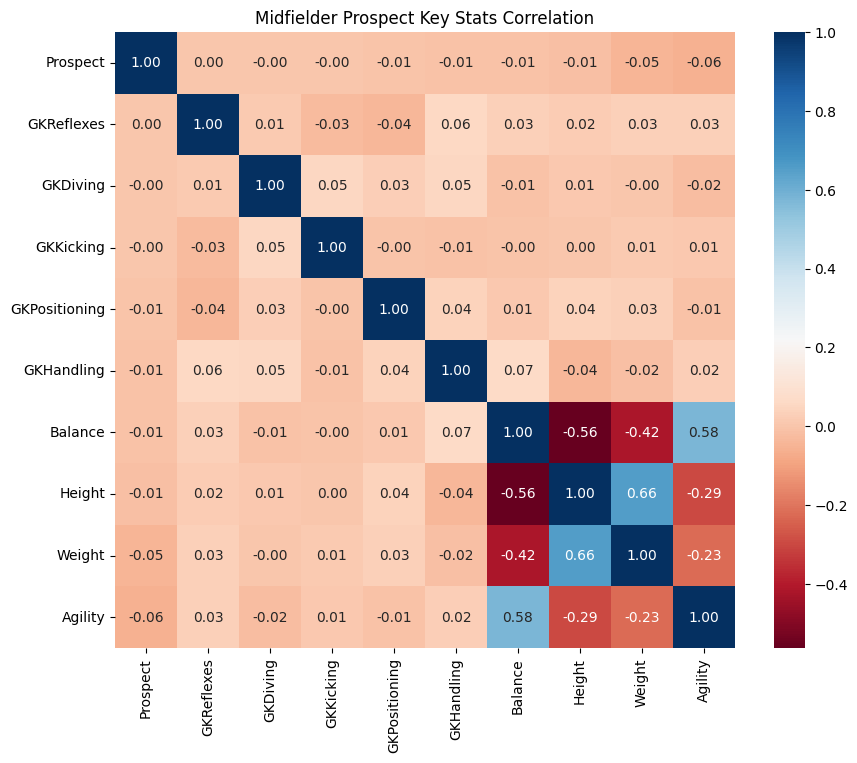

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 미드필더 데이터 필터링 (이전 단계 복습)
target_positions = ['RM', 'CAM', 'LM', 'CM', 'CDM']
mid_df = df[df['Position'].isin(target_positions)].copy()

# 2. 수치형 데이터만 선택 (상관관계 계산을 위함)
# 문자열(ID, Position 등)은 제외하고 분석합니다.
numeric_mid_df = mid_df.select_dtypes(include=['number'])

# 3. 'Prospect'와의 상관계수 계산
# 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계입니다.
correlations = numeric_mid_df.corr()['Prospect'].sort_values(ascending=False)

# 4. 상위 10개 핵심 지표 출력
print("### 미드필더 유망주 결정 핵심 스탯 Top 10 ###")
print(correlations.head(11)) # 자기 자신(Prospect) 포함 11개 출력

# 5. 시각화 (Heatmap)
# 주요 스탯 몇 개만 골라 열지표 간의 관계를 봅니다.
top_features = correlations.index[:10]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_mid_df[top_features].corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Midfielder Prospect Key Stats Correlation')
plt.show()

In [10]:
import pandas as pd

# 1. 데이터 로드
df = pd.read_csv(r'C:\Users\kolan\github\DataScience\soccer\player_data\train.csv')

# 2. 미드필더 포지션 필터링
target_positions = ['RM', 'CAM', 'LM', 'CM', 'CDM']
mid_df = df[df['Position'].isin(target_positions)].copy()

# 3. 제외할 컬럼 리스트 (GK 관련 및 불필요한 지표)
cols_to_drop = [
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'GKRating', # GK 관련
    'HeadingAccuracy', 'SlidingTackle', # 미드필더에겐 비교적 우선순위 낮은 수비 지표
    'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate' # 분석 모델에 따라 제외 가능 (선택사항)
]

# 4. 미드필더에게 중요한 컬럼 위주로 선택 (혹은 위 리스트 제외)
# 직접 선택하는 방식이 나중에 모델링할 때 더 깔끔합니다.
main_features = [
    'ID', 'Age', 'Height', 'Weight', 'Position', 
    'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
    'ShortPassing', 'LongPassing', 'BallControl', 'Vision', 'Reactions', 'Composure',
    'Crossing', 'Dribbling', 'Stamina', 'Agility', 'Acceleration',
    'CAMRating', 'CMRating', 'RMRating', 'LMRating', 'CDMRating', # 미드필더 관련 평점
    'Prospect' # 타겟 변수 (가장 중요!)
]

# 최종 데이터프레임 생성
mid_clean_df = mid_df[main_features].copy()

# 5. 결과 확인
print(f"정제 후 컬럼 수: {len(mid_clean_df.columns)}개")
print(mid_clean_df.columns.tolist())
mid_clean_df.head()

정제 후 컬럼 수: 28개
['ID', 'Age', 'Height', 'Weight', 'Position', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'ShortPassing', 'LongPassing', 'BallControl', 'Vision', 'Reactions', 'Composure', 'Crossing', 'Dribbling', 'Stamina', 'Agility', 'Acceleration', 'CAMRating', 'CMRating', 'RMRating', 'LMRating', 'CDMRating', 'Prospect']


,ID,Age,Height,Weight,Position,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,...,Dribbling,Stamina,Agility,Acceleration,CAMRating,CMRating,RMRating,LMRating,CDMRating,Prospect
7,TRAIN_0007,21,189,64,CDM,4.0580,3.5526,4.7059,4.3939,5.5263,...,6.1957,4.9383,5.3947,5.4217,5.2000,5.4795,5.2703,5.2703,6.1429,0
10,TRAIN_0010,20,180,72,CAM,4.9275,4.7368,4.7059,4.3939,4.0789,...,5.6522,4.8148,5.3947,5.7831,5.4667,5.4795,5.4054,5.4054,5.2857,0
11,TRAIN_0011,21,186,82,CM,6.2319,5.5263,6.0294,5.4545,5.7895,...,6.1957,8.1481,6.8421,6.9880,6.4000,6.7123,6.4865,6.4865,6.8571,0
13,TRAIN_0013,21,181,71,RM,8.6957,7.3684,6.1765,7.2727,3.4211,...,8.1522,7.9012,9.2105,8.7952,7.7333,6.8493,7.8378,7.8378,5.2857,0
14,TRAIN_0014,20,178,63,CAM,7.6812,6.0526,5.2941,6.3636,2.2368,...,7.5000,5.6790,7.1053,7.9518,6.8000,6.1644,6.7568,6.7568,4.5714,0


In [11]:
import pandas as pd

# 1. 정제된 데이터 기반 (이전 단계에서 만든 mid_clean_df 사용)
# 만약 코드를 새로 실행하신다면 위에서 만든 필터링 로직을 거친 df를 사용하세요.

# 2. 수치형 데이터만 추출하여 상관관계 계산
correlations = mid_clean_df.select_dtypes(include=['number']).corr()['Prospect']

# 3. 결과 정리 (절대값 기준으로 영향력이 큰 순서 정렬)
# Prospect 자신은 제외하고 정렬합니다.
top_5_all = correlations.drop('Prospect').abs().sort_values(ascending=False).head(5)

# 4. 출력용 원본 수치 매칭
print("="*40)
print("🚀 미드필더 유망주 판별 핵심 지표 Top 5")
print("="*40)
for i, (col, val) in enumerate(top_5_all.items(), 1):
    original_val = correlations[col]
    direction = "정비례(+)" if original_val > 0 else "반비례(-)"
    print(f"{i}위: {col:<15} | 상관계수: {original_val:>7.4f} ({direction})")
print("="*40)

🚀 미드필더 유망주 판별 핵심 지표 Top 5
1위: Age             | 상관계수: -0.5757 (반비례(-))
2위: Stamina         | 상관계수: -0.2858 (반비례(-))
3위: Reactions       | 상관계수: -0.2652 (반비례(-))
4위: CMRating        | 상관계수: -0.2648 (반비례(-))
5위: RMRating        | 상관계수: -0.2638 (반비례(-))


C:\Users\kolan\AppData\Local\Temp\ipykernel_20684\1753848172.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_corr.values, y=top_10_names, palette="viridis")


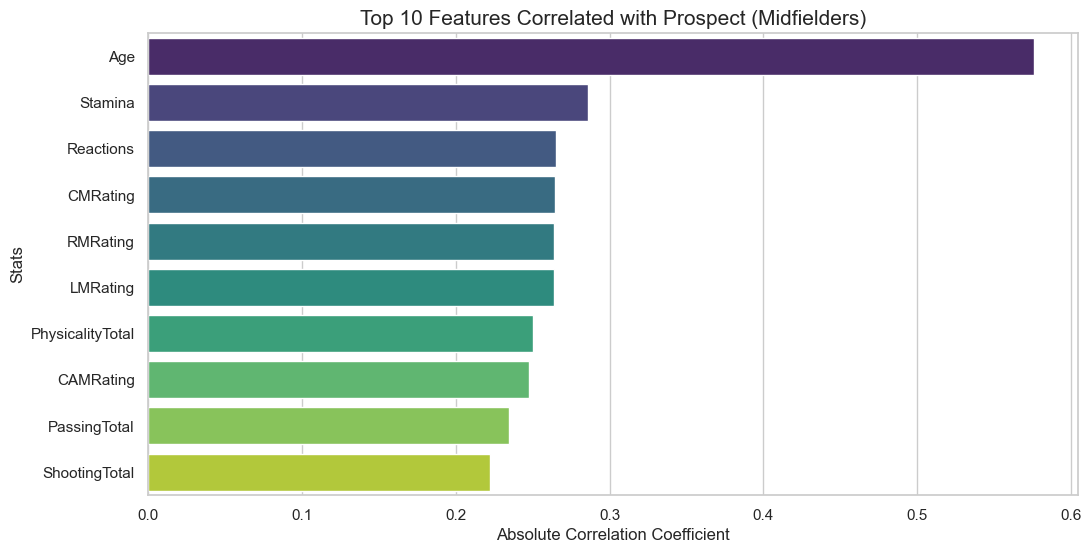

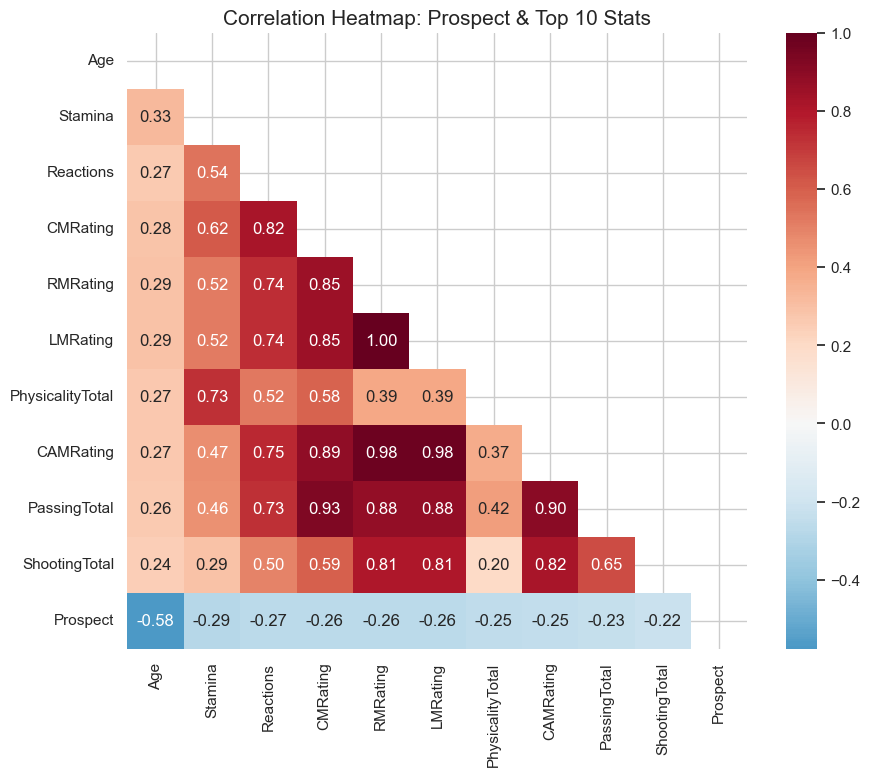

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 상관관계 데이터 준비 (절대값 기준 정렬)
correlations = mid_clean_df.select_dtypes(include=['number']).corr()['Prospect'].drop('Prospect')
top_10_corr = correlations.abs().sort_values(ascending=False).head(10)
top_10_names = top_10_corr.index

# 시각화를 위한 스타일 설정
sns.set_theme(style="whitegrid")

# 2. 막대 그래프 (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_corr.values, y=top_10_names, palette="viridis")
plt.title('Top 10 Features Correlated with Prospect (Midfielders)', fontsize=15)
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Stats')
plt.show()

# 3. 히트맵 (Heatmap)
# Top 10 지표들 간의 실제 상관계수(음수/양수 포함)를 보여줍니다.
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(mid_clean_df[top_10_names.append(pd.Index(['Prospect']))].corr(), dtype=bool))
sns.heatmap(mid_clean_df[top_10_names.append(pd.Index(['Prospect']))].corr(), 
            annot=True, fmt=".2f", cmap='RdBu_r', center=0, mask=mask)
plt.title('Correlation Heatmap: Prospect & Top 10 Stats', fontsize=15)
plt.show()

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. 원-핫 인코딩 (Position 컬럼을 5개의 0/1 컬럼으로 분리)
mid_encoded = pd.get_dummies(mid_clean_df, columns=['Position'])

# 2. 불필요한 식별자 제거 (ID는 학습에 방해됨)
X = mid_encoded.drop(columns=['ID', 'Prospect'])
y = mid_encoded['Prospect']

# 3. 수치 데이터 스케일링 (모든 스탯의 단위를 맞춤)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 변환된 결과 확인 (데이터프레임 형태로 다시 보기)
X_final = pd.DataFrame(X_scaled, columns=X.columns)
print("--- 변환된 데이터 샘플 (첫 5행) ---")
print(X_final.head())

--- 변환된 데이터 샘플 (첫 5행) ---
        Age    Height    Weight  PaceTotal  ShootingTotal  PassingTotal  \
0  1.132620  2.085894 -1.112192  -1.782487      -1.150967     -0.099913   
1  0.334305  0.460731  0.365283  -1.028753      -0.053699     -0.099913   
2  1.132620  1.544173  2.212128   0.101977       0.677844      1.261610   
3  1.132620  0.641305  0.180599   2.237743       2.384716      1.412936   
4  0.334305  0.099584 -1.296876   1.358315       1.165508      0.505185   

   DribblingTotal  DefendingTotal  PhysicalityTotal  ShortPassing  ...  \
0       -0.971936        1.002507          1.133255      0.659665  ...   
1       -0.971936        0.130253         -0.119460      0.092420  ...   
2        0.071960        1.161120          2.044327      0.943171  ...   
3        1.861523       -0.266160          0.222183      0.659665  ...   
4        0.966741       -0.979860         -0.005533      0.092420  ...   

   CMRating  RMRating  LMRating  CDMRating  Position_n  Position_CAM  \
0 -0.3

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. 문자형 데이터 숫자 변환 (Position 등)
le = LabelEncoder()
mid_clean_df['Position_n'] = le.fit_transform(mid_clean_df['Position'])

# 2. 독립변수(X)와 종속변수(y, 유망주 여부) 분리
# 분석에 사용할 수치형 컬럼들만 선택
features = mid_clean_df.select_dtypes(include=['number']).columns.drop('Prospect')
X = mid_clean_df[features]
y = mid_clean_df['Prospect']

# 3. 데이터 분할 (학습용 80%, 검증용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 스케일링 (수치 표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("최종 전처리 완료!")
print(f"학습 데이터 크기: {X_train_scaled.shape}")
print(f"검증 데이터 크기: {X_test_scaled.shape}")

최종 전처리 완료!
학습 데이터 크기: (1048, 26)
검증 데이터 크기: (263, 26)
